# Import packages

In [1]:
import pandas as pd
import wikipedia
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

from sklearn.metrics.pairwise import linear_kernel
import operator

# Define main fuctions 

In [2]:
# find unique

def unique(s):
    

    n = len(s)
    if n == 0:
        return []

   
    u = {}
    try:
        for x in s:
            u[x] = 1
    except TypeError:
        del u  # move on to the next method
    else:
        return u.keys()

   
    try:
        t = list(s)
        t.sort()
    except TypeError:
        del t  # move on to the next method
    else:
        assert n > 0
        last = t[0]
        lasti = i = 1
        while i < n:
            if t[i] != last:
                t[lasti] = last = t[i]
                lasti += 1
            i += 1
        return t[:lasti]

    # Brute force is all that's left.
    u = []
    for x in s:
        if x not in u:
            u.append(x)
    return u

def testCleaning(text):     
        #print '-'*50 + '\n--------------------Punctuation removing------------------\n' + '-'*50
        text = ''.join((c if c.isalnum() else ' ') for c in text.lower())
        
        #print '-'*50 + '\n-------------------- Stopwords deleting ------------------\n' + '-'*50
        text = ' '.join([word for word in text.split() if word not in cachedStopWords])
        
        #print '-'*50 + '\n-------------------- Numbers removing ------------------\n' + '-'*50
        text = ' '.join([i for i in text.split() if not i.isdigit()])
        
        #print '-'*50 + '\n-------------------- Remove short words ------------------\n' + '-'*50
        text = ' '.join([i for i in text.split() if len(i) > 2])
        
        return text  
    
    
def tf_idf(text):
    vectorizer = CountVectorizer(max_features=5000)

    transformer = TfidfTransformer()

    trainVectorizerArray = vectorizer.fit_transform(text).toarray()


    transformer.fit(trainVectorizerArray)

    a = transformer.transform(trainVectorizerArray).toarray()
    
    tfidf = pd.DataFrame(a)
    return tfidf


# Dataset reading

In [4]:
# read and merge datasets

ratings = pd.read_table('ml-1m/ratings.dat',sep='::',names=['user','movie','rating','time'])
users = pd.read_table('ml-1m/users.dat',sep='::',names=['user','gender','age','occupation','zip'])
movies = pd.read_table('ml-1m/movies.dat',sep='::',names=['movie','title','genre'])
movielens = pd.merge(pd.merge(ratings,users),movies)
movielens[:5]

C:\Python27\lib\site-packages\pandas\io\parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


,user,movie,rating,time,gender,age,occupation,zip,title,genre
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [5]:
# calculate the number of films ratings

titles = movielens.title.values
len(titles)

1000209

In [6]:
# calculate the number of unique films

titles_unique = unique(titles)
len(titles_unique)

3706

In [7]:
titles_unique[:3]

['Irma la Douce (1963)', 'Solaris (Solyaris) (1972)', 'Birdcage, The (1996)']

In [8]:
titles_cleaned = [x.split('(')[0][:-1] for x in titles_unique]
titles_cleaned[:3]

['Irma la Douce', 'Solaris', 'Birdcage, The']

---
# You can pass next step with Wikipedia API query
---

# Wikipedia API quering

In [ ]:
# search film description by title and year

summary = []
for i in xrange(len(titles_unique)):
    try:
        summary.append(wikipedia.summary(titles_unique[i]))
        print i, titles_unique[i]
    except:
        summary.append('1')    

0 Irma la Douce (1963)
2 Birdcage, The (1996)
3 B. Monkey (1998)
4 Little Big League (1994)
5 Crew, The (2000)
6 Country Life (1994)
7 Contender, The (2000)
8 Mortal Kombat (1995)
10 Mummy's Ghost, The (1944)
11 Exorcist, The (1973)
12 Mommie Dearest (1981)
13 Tin Men (1987)
14 Crocodile Dundee II (1988)
17 Ride with the Devil (1999)
18 Cat on a Hot Tin Roof (1958)
19 Almost Heroes (1998)
22 He Walked by Night (1948)
23 Monument Ave. (1998)
25 You Can't Take It With You (1938)
26 Hot Lead and Cold Feet (1978)
27 Beneath the Planet of the Apes (1970)
28 Johnny 100 Pesos (1993)
29 Mole People, The (1956)
30 Autumn Tale, An (Conte d'automne) (1998)
31 Jar, The (Khomreh) (1992)
32 Bride of Frankenstein (1935)
33 Twin Peaks: Fire Walk with Me (1992)
34 Men With Guns (1997)
35 Long Goodbye, The (1973)
37 Pompatus of Love, The (1996)
38 2 Days in the Valley (1996)
39 Jerky Boys, The (1994)
40 Leatherface: Texas Chainsaw Massacre III (1990)
41 Trouble with Harry, The (1955)
42 Close Shave, A (

In [35]:
df= pd.DataFrame(columns = ["Film", "Summary"])
df.loc[:, "Film"] = titles_unique
df.loc[:, "Summary"] = summary

In [49]:
df['Summary'] = df['Summary'].map(lambda x: testCleaning(x))
df1 = df[df["Summary"] != '']

In [59]:
df1 = df["Summary"]
df1.to_csv("Summary.csv", index = False, encoding='utf-8')

### Search by descriptions for the films, which did not recive the Wikipedia information

In [ ]:
for i in xrange(len(df)):
    if len(df.loc[i, "Summary"]) < 2:
        try: 
            df.loc[i, "Summary"] = wikipedia.summary(df.loc[i, "Film"].split(" (")[0] + " (film)")
            print i, df.loc[i, "Film"].split(" (")[0]
        except:
            pass

# Important!!! To avoid the quering Wikipedia API , you can just open Summary.csv file 

In [9]:
df3 = pd.read_csv("Summary.csv",encoding='utf-8', names = ["Summary"])
df3.loc[:, "Film"] = titles_unique
df3.loc[:, "Text"] = df3['Film'].map(lambda x: testCleaning(x)) + ' ' + df3['Summary']
df3 = df3.fillna(0)
df3 = df3[df3.Text != 0]

In [10]:
df3[:3]

,Summary,Film,Text
0,diamond june april comedy drama writer hollywo...,Irma la Douce (1963),irma douce diamond june april comedy drama wri...
2,birdcage american comedy film directed mike ni...,"Birdcage, The (1996)",birdcage birdcage american comedy film directe...
3,michael radford born february english film dir...,B. Monkey (1998),monkey michael radford born february english f...


# TF-IDF model building

In [11]:
tfidf = tf_idf(df3.Text.values)

# Similarity searching

In [14]:
similarity = []
for i in xrange(len(df3)):
    j = i+1
    similarity.append(linear_kernel(tfidf[i:j], tfidf).flatten())

In [15]:
similarity_title = dict(zip(titles_unique, similarity))

In [ ]:
for k, v in similarity_title.iteritems():
    similarity_title[k] = dict(zip(titles_unique, v))
    
    
for k, v in similarity_title.iteritems():   
    similarity_title[k] = sorted(similarity_title[k].items(), key=operator.itemgetter(1), reverse=True)

Let's look at the work of the above code

In [17]:
similarity_title['Irma la Douce (1963)'][1:]

[('And Now for Something Completely Different (1971)', 0.34761158112565094),
 ('Jungle Fever (1991)', 0.25963850579894182),
 ('Sandpiper, The (1965)', 0.19948844912713082),
 ('Grand Canyon (1991)', 0.17733253582818573),
 ('Intimate Relations (1996)', 0.17374962009065004),
 ('Last Emperor, The (1987)', 0.13730910199003377),
 ('Mr. Mom (1983)', 0.13146435690866304),
 ('Angus (1995)', 0.13111511486404875),
 ('Max Dugan Returns (1983)', 0.12626758897534965),
 ('Spring Fever USA (a.k.a. Lauderdale) (1989)', 0.1261580424948196),
 ('28 Days (2000)', 0.12612595878143487),
 ('Bootmen (2000)', 0.12535581612932031),
 ('Castle, The (1997)', 0.11962772201992279),
 ('Spy Hard (1996)', 0.11935689703640757),
 ('Sum of Us, The (1994)', 0.11927806693986265),
 ('Time Bandits (1981)', 0.11795845604123215),
 ('Grass Harp, The (1995)', 0.11750439131221468),
 ('Clear and Present Danger (1994)', 0.11568868260363534),
 ('Halloween (1978)', 0.11404560132704988),
 ('Shall We Dance? (1937)', 0.11287501511791907),

In [27]:
m1 = movies[movies.title == 'Irma la Douce (1963)']
# Display the average rating
m1.loc[3007, 'avg_rating'] = movielens[movielens.title == 'Irma la Douce (1963)']['rating'].mean()
# and how many times this movie was watched
m1.loc[3007, 'amount'] = movielens[movielens.title == 'Irma la Douce (1963)']['rating'].count()
m1

,movie,title,genre,avg_rating,amount
3007,3076,Irma la Douce (1963),Comedy,3.709677,93


In [33]:
def table(title):
    top20 = map(lambda x: x[0], similarity_title[title][1:])[:20]
    rec_for_m = movies[movies.title.isin(top20)]
    # Display the average rating and how many times this movie was watched
    for i in rec_for_m.index.values:
        x = movielens[movielens.title == rec_for_m.loc[i, 'title']]['rating']
        rec_for_m.loc[i, 'avg_rating'] = x.mean()
        rec_for_m.loc[i, 'amount'] = x.count()
    return rec_for_m
    
table('Irma la Douce (1963)')

,movie,title,genre,avg_rating,amount
320,324,"Sum of Us, The (1994)",Comedy,3.969697,33
345,349,Clear and Present Danger (1994),Action|Adventure|Thriller,3.726157,1059
691,700,Angus (1995),Comedy,3.324138,145
733,743,Spy Hard (1996),Comedy,2.570093,107
757,767,"Grass Harp, The (1995)",Drama,3.208333,24
1052,1066,Shall We Dance? (1937),Comedy|Musical|Romance,4.165714,175
1492,1528,Intimate Relations (1996),Comedy,2.000000,2
1891,1960,"Last Emperor, The (1987)",Drama|War,3.976415,636
1913,1982,Halloween (1978),Horror,3.713439,506
2043,2112,Grand Canyon (1991),Crime|Drama,3.488439,346


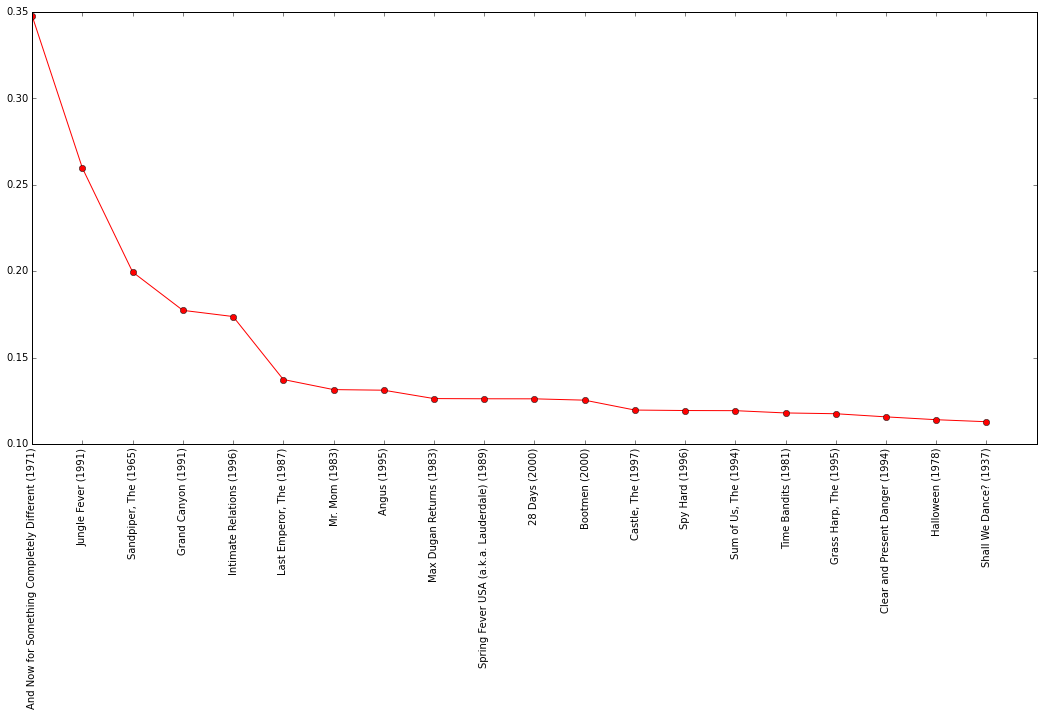

In [58]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = (18, 8)

def plot(title):
    top20 = similarity_title[title][1:][:20]
    x = np.arange(20)
    y = map(lambda x: x[1], top20)
    labels = map(lambda x: x[0].decode('ISO-8859-1'), top20)

    plt.plot(x, y, 'ro-')
    plt.xticks(x, labels, rotation='vertical')
    plt.subplots_adjust(bottom=0.15)
    plt.show()
    
plot('Irma la Douce (1963)')

What we see:

* The list of recommendation contains many movies of Comedy genre (or relative and mixed genres) as the selected film "Irma la Douce (1963)"

* The average rating of reccomended movies coinsides with the ratimg of the selected movie (if taking into account movies with large amount of marks)

* The closet movie "Sum of Us, The (1994)" is also Comedy and has almost the same average rating

In [18]:
similarity_title['Spitfire Grill, The (1996)'][1:]

[('American Buffalo (1996)', 0.593209216857424),
 ('Big Sleep, The (1946)', 0.43338194404667274),
 ('Rules of Engagement (2000)', 0.39612319172642674),
 ('Wedding Gift, The (1994)', 0.36348131372108705),
 ('Diva (1981)', 0.35560175898477581),
 ('Homeward Bound: The Incredible Journey (1993)', 0.34495939112856638),
 ('Beyond the Mat (2000)', 0.34260388716996254),
 ('Ideal Husband, An (1999)', 0.33305450525182528),
 ('King of Masks, The (Bian Lian) (1996)', 0.3318274689620313),
 ('Sid and Nancy (1986)', 0.32040438396560428),
 ('Cup, The (Ph\xf6rpa) (1999)', 0.31892702725680061),
 ('Dancing at Lughnasa (1998)', 0.28676944008367211),
 ("All the Rage (a.k.a. It's the Rage) (1999)", 0.28434534661634764),
 ('Alvarez Kelly (1966)', 0.2815974859908571),
 ('Class (1983)', 0.27495327505584438),
 ('Tales of Terror (1962)', 0.26579739456936752),
 ('D\xe9j\xe0 Vu (1997)', 0.25672516692565728),
 ('Retroactive (1997)', 0.22865239878212018),
 ('Prom Night IV: Deliver Us From Evil (1992)', 0.22310089762

In [31]:
m2 = movies[movies.title == 'Spitfire Grill, The (1996)']
# Display the average rating
m2.loc[837, 'avg_rating'] = movielens[movielens.title == 'Spitfire Grill, The (1996)']['rating'].mean()
# and how many times this movie was watched
m2.loc[837, 'amount'] = movielens[movielens.title == 'Spitfire Grill, The (1996)']['rating'].count()
m2

,movie,title,genre,avg_rating,amount
837,848,"Spitfire Grill, The (1996)",Drama,3.435897,156


In [34]:
table('Spitfire Grill, The (1996)')

,movie,title,genre,avg_rating,amount
567,571,"Wedding Gift, The (1994)",Drama,3.588235,34
796,806,American Buffalo (1996),Drama,3.166667,60
1002,1015,Homeward Bound: The Incredible Journey (1993),Adventure|Children's,3.346154,234
1244,1264,Diva (1981),Action|Drama|Mystery|Romance|Thriller,4.054475,257
1264,1284,"Big Sleep, The (1946)",Film-Noir|Mystery,4.312384,541
1921,1990,Prom Night IV: Deliver Us From Evil (1992),Horror,1.687500,16
2106,2175,D�j� Vu (1997),Drama|Romance,3.833333,18
2172,2241,Class (1983),Comedy,2.775194,129
2272,2341,Dancing at Lughnasa (1998),Drama,3.272727,44
2279,2348,Sid and Nancy (1986),Drama,3.552632,304


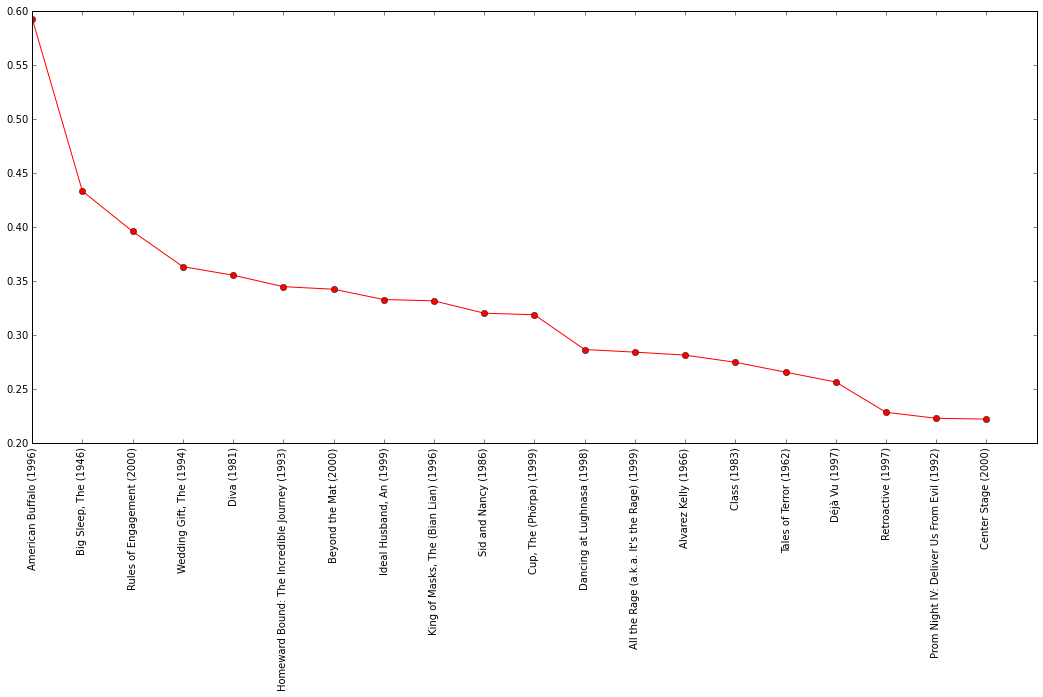

In [59]:
plot('Spitfire Grill, The (1996)')

What we see:

* The list of recommendation contains many movies of Drama genre (or relative and mixed genres) as the selected film "Spitfire Grill, The (1996)"

* The average rating of reccomended movies coinsides with the ratimg of the selected movie (if taking into account movies with large amount of marks)

* The closest movies "Wedding Gift, The (1994)" and "American Buffalo (1996)" are also Dramas, has almost the same average rating and were released almost on time.

# Book-crossing

In [12]:
books = pd.read_csv('book-crossing/BX-Books.csv', skiprows=1, sep=';',
                    names=['book_id', 'title', 'author', 'year', 'publisher', 'url1', 'url2', 'url3'])
books.drop(['url1', 'url2', 'url3'], axis=1, inplace=True)
print books.shape
books.head()

(271379, 5)


C:\Python27\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,book_id,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [13]:
titles = books.title.values[:2000]
len(titles)

2000

In [14]:
titles_unique = unique(titles)
len(titles_unique)

1948

In [15]:
titles_unique = [testCleaning(x) for x in titles_unique]

In [16]:
tfidf = tf_idf(titles_unique)

In [23]:
similarity = []
for i in xrange(len(tfidf)):
    j = i+1
    similarity.append(linear_kernel(tfidf[i:j], tfidf).flatten())

In [24]:
similarity_title = dict(zip(titles_unique, similarity))

for k, v in similarity_title.iteritems():
    similarity_title[k] = dict(zip(titles_unique, v))
    
    
for k, v in similarity_title.iteritems():   
    similarity_title[k] = sorted(similarity_title[k].items(), key=operator.itemgetter(1), reverse=True)

In [25]:
titles_unique[:5]

['lena state quarters',
 'crow road',
 'impossible vacation',
 'life',
 'tycoon terms disturb harlequin presents']

In [97]:
[x for x in similarity_title['crow road'][1:] if x[1] > 0.0]

[('road essential penguin', 0.36882485742263954),
 ('crow lake today show book club', 0.3548833572440685),
 ('trixie belden mystery glen road mystery glen road', 0.3372123069534757),
 ('florida road kill novel', 0.33555402882778285),
 ('road penguin 20th century classics', 0.30412501480555598),
 ('pilgrimage road santiago complete cultural handbook', 0.25434281607267367)]

In [100]:
[x for x in similarity_title['tycoon terms disturb harlequin presents'][1:] if x[1] > 0.0]

[('harlequin valentine', 0.25409519929956048),
 ('sheets harlequin temptation', 0.20178409803079711),
 ('ron hubbard presents writers future ron hubbard presents writers future',
  0.18462488894551962),
 ('blink eye taylor clan harlequin intrigue', 0.14539994612833973),
 ('big fake green card wedding harlequin american romance',
  0.13654371913566646),
 ('dumb century onion presents years headlines america finest news source',
  0.13483431655982289),
 ('virgin secret marriage brides holly springs harlequin american romance',
  0.12661895530808825)]

In [20]:
[x for x in similarity_title['lena state quarters'][1:] if x[1] > 0.0]

[('state grace', 0.48281262030862432),
 ('five quarters orange', 0.44197720258999745),
 ('stupid white men sorry excuses state nation', 0.26078331458678261),
 ('belonging two berlins kin state nation cambridge studies social cultural anthropology',
  0.2233823566532635)]

In [77]:
import numpy as np

selected_books = np.random.choice(len(titles_unique), 10)
selected_books = np.array(titles_unique)[selected_books]
selected_books

array(['miss zukas raven dance', 'door december',
       'timeless four breathtaking tales hearts reach across time love midsummer day dream lovers golden drum time echoes',
       'heartbreaking work staggering genius',
       'hitler secret bankers myth swiss neutrality holocaust',
       'father house point',
       'confessions shopaholic summer display opportunity',
       'illustrated encyclopedia buddhist wisdom',
       'hand angel silhouette desire', 'rosie walk'], 
      dtype='|S167')

In [78]:
def get_M(selected_books, n=10):
    selected_books = list(selected_books)
    M = np.zeros((n, n))

    res = []
    for i in range(len(selected_books)):
        for j in similarity_title[selected_books[i]][1:]:
            if j[0] in selected_books[i+1:]:
                res.append((selected_books[i], j[0], j[1]))
                M[i, selected_books.index(j[0])] = j[1]
                M[selected_books.index(j[0]), i] = j[1]
    #print res
    return M

M = get_M(selected_books)

In [66]:
M

array([[ 0.        ,  0.        ,  0.17103345,  0.        ,  0.        ,
         0.        ,  0.        ,  0.04507592,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.17103345,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

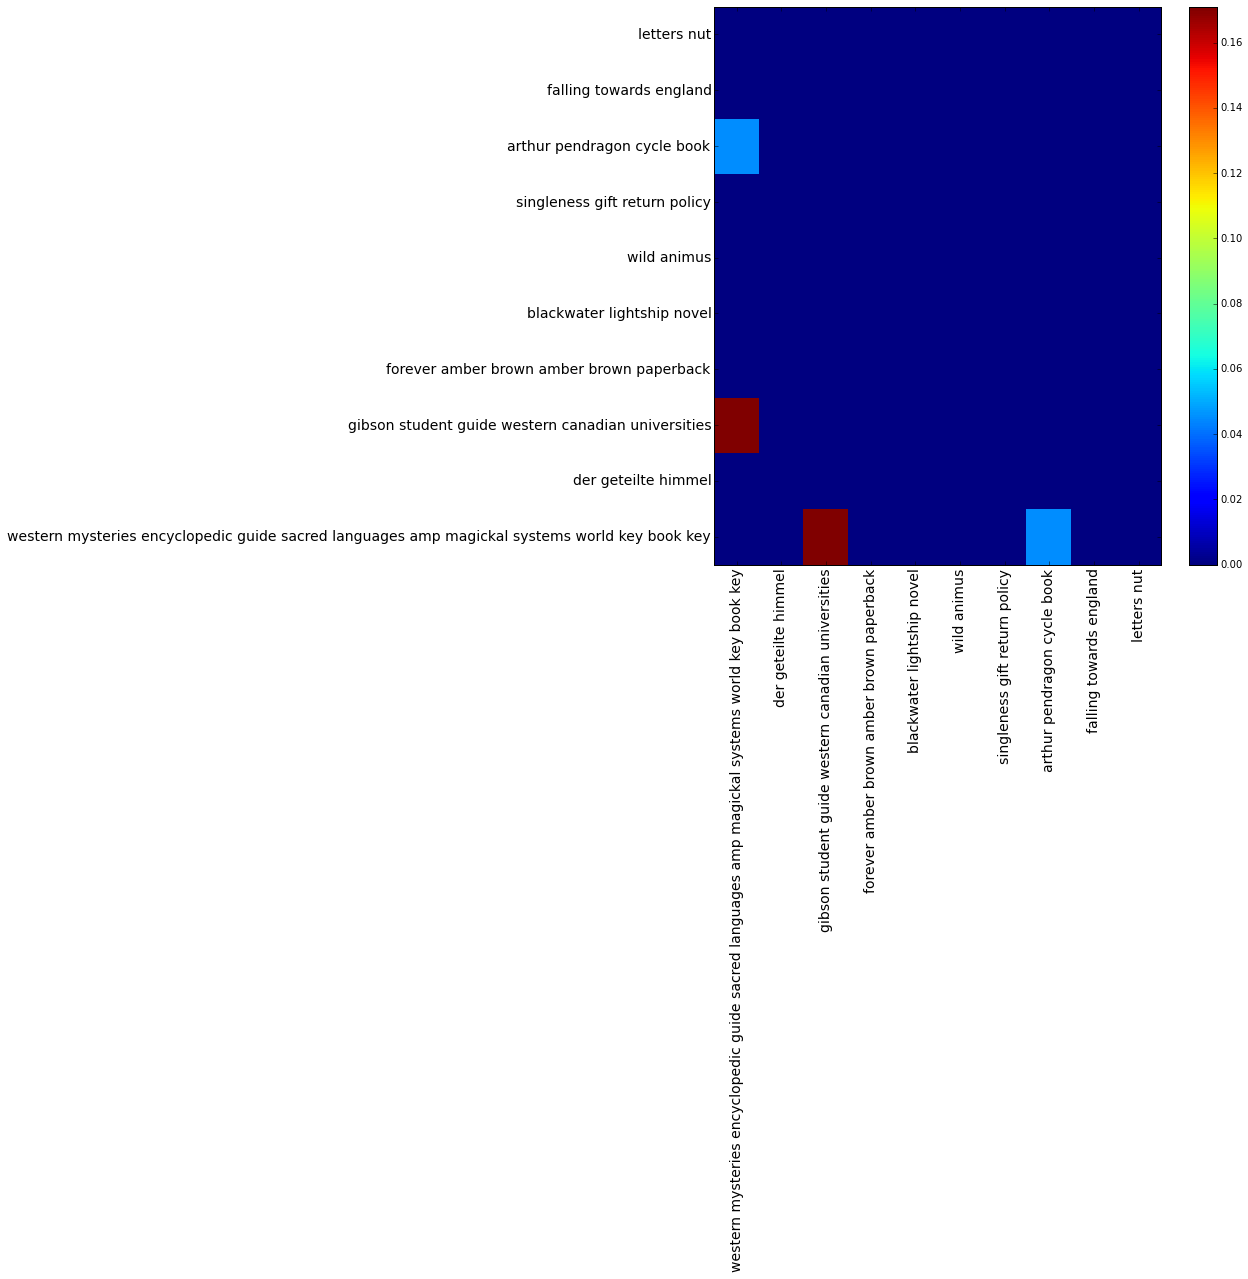

In [67]:
import matplotlib.pylab as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)
x = np.arange(0.5,10.5)

plt.pcolor(M)
plt.colorbar()
plt.yticks(x, selected_books, size=14)
plt.xticks(x, selected_books, rotation='vertical', size=14)
plt.show()

In [84]:
selected_books = np.random.choice(len(titles_unique), 20)
selected_books = np.array(titles_unique)[selected_books]
selected_books

array(['forest house', 'deep wizardry second book young wizards series',
       'stimulus factor', 'loving', 'one thinks greenland', 'rainmaker',
       'four complete lord peter wimsey novels', 'middlesex novel',
       'business action', 'belgrave square', 'dragons summer flame',
       'night sins', 'crewel lye', 'good bed',
       'hand angel silhouette desire',
       'charlotte web book charm charming classics', 'vice',
       'return jedi star wars',
       'fortune river leonardo vinci niccolo machiavelli magnificent dream change course florentine history',
       'like school world series'], 
      dtype='|S167')

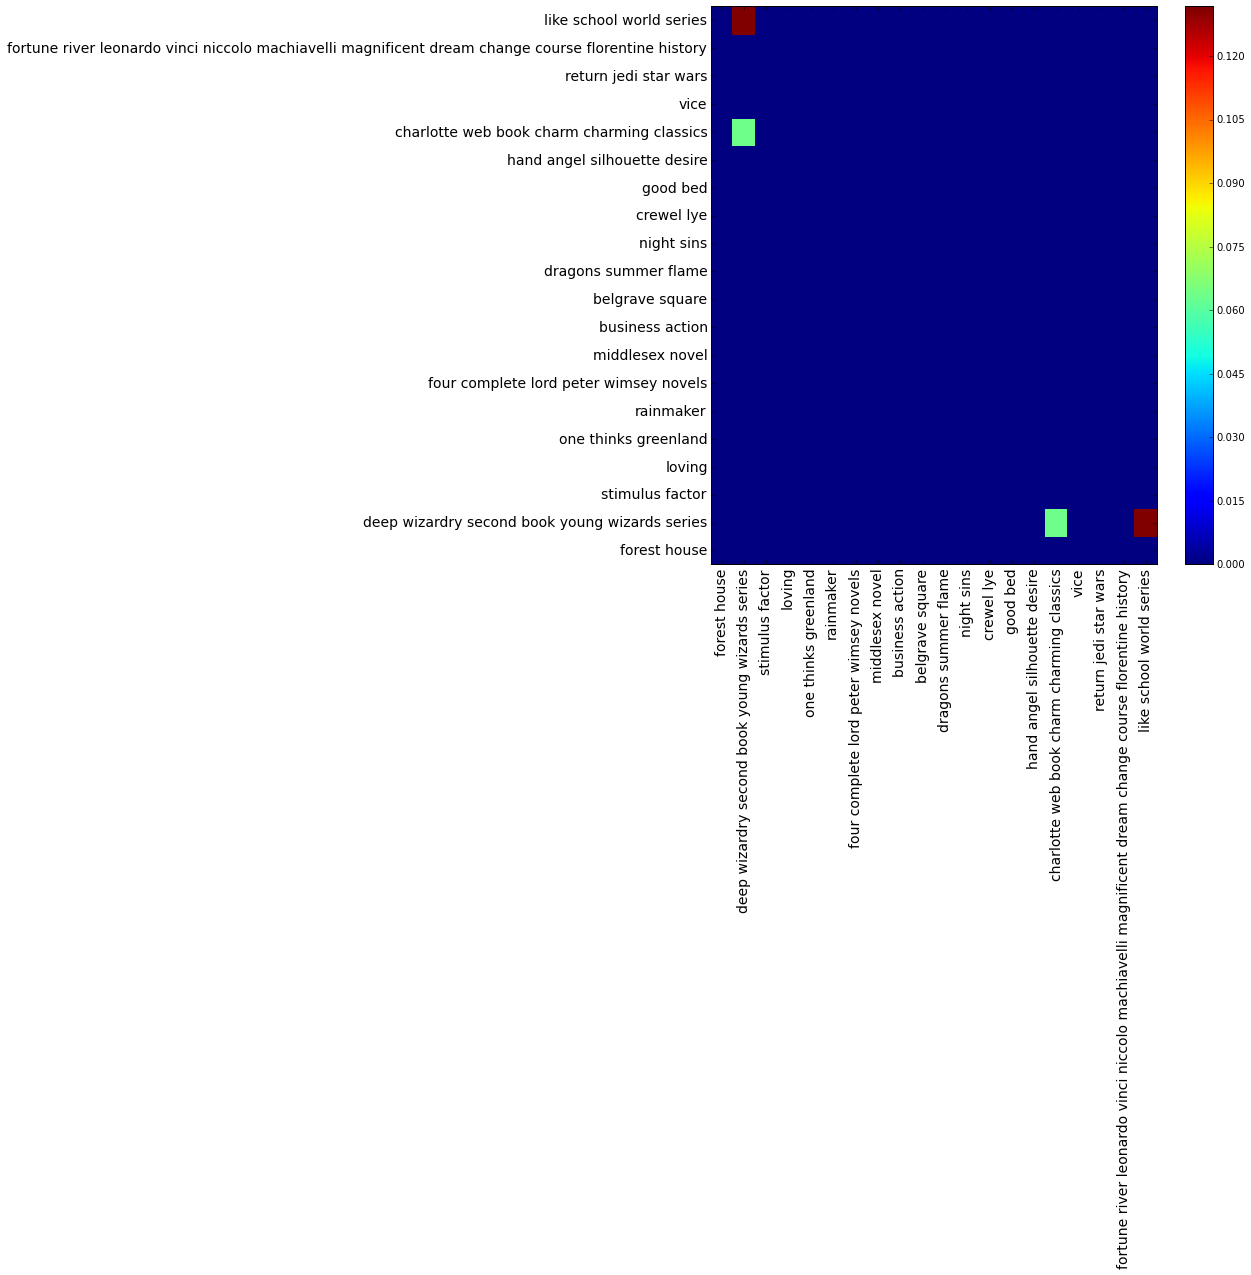

In [85]:
M = get_M(selected_books, 20)
x = np.arange(0.5,20.5)
plt.pcolor(M)
plt.colorbar()
plt.yticks(x, selected_books, size=14)
plt.xticks(x, selected_books, rotation='vertical', size=14)
plt.show()